In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

sns.set(style='white')

In [2]:
data = pd.read_csv('../dataset/csv/churn_prediction.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [5]:
data.select_dtypes(include=['int64', 'float64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                        float64
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [6]:
customer_details = ['customer_id', 'age', 'vintage']
current_month = ['current_balance','current_month_debit','current_month_credit','current_month_balance']

In [16]:
def UVA_numeric(data, var_group):
    size = len(var_group)
    plt.figure(figsize=(15*size,8), dpi=100)
    
    for j,i in enumerate(var_group):
        
        mini = data[i].min()
        maxi = data[i].max()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()
        
        points = mean - st_dev, mean + st_dev
        
        plt.subplot(1, size, j+1)
        sns.kdeplot(data[i], shade=True)
        sns.lineplot(points, [0,0], color='black', label='std_dev')
        sns.scatterplot([mini, maxi], [0,0], color='orange', label='min/max')
        sns.scatterplot(mean, [0], color='red', label='mean')
        sns.scatterplot(median, [0], color='blue', label='median')
        plt.xlabel('{}'.format(i))
        plt.ylabel('density')
        

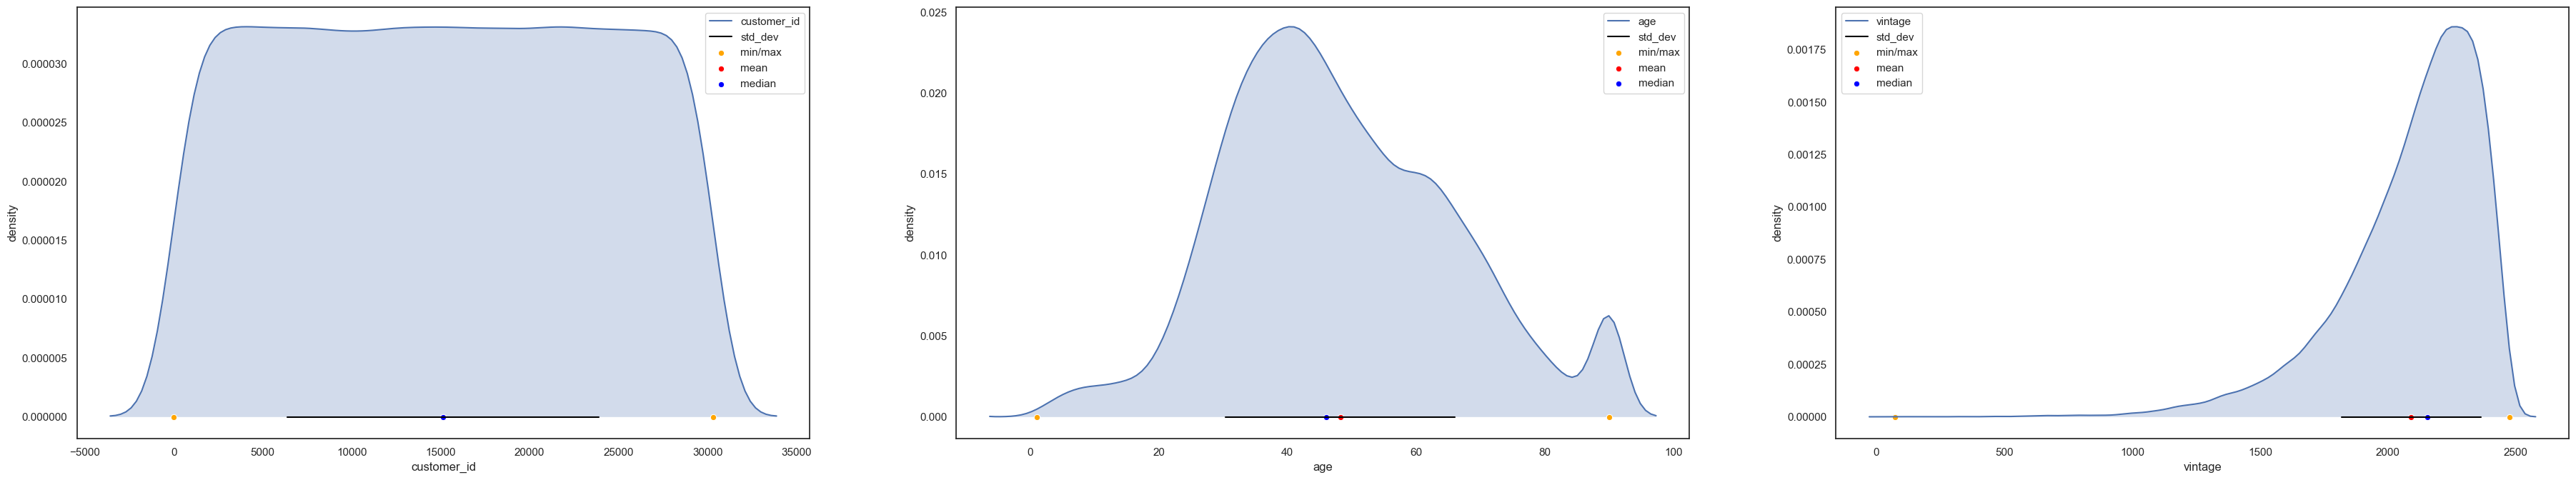

In [17]:
UVA_numeric(data, customer_details)

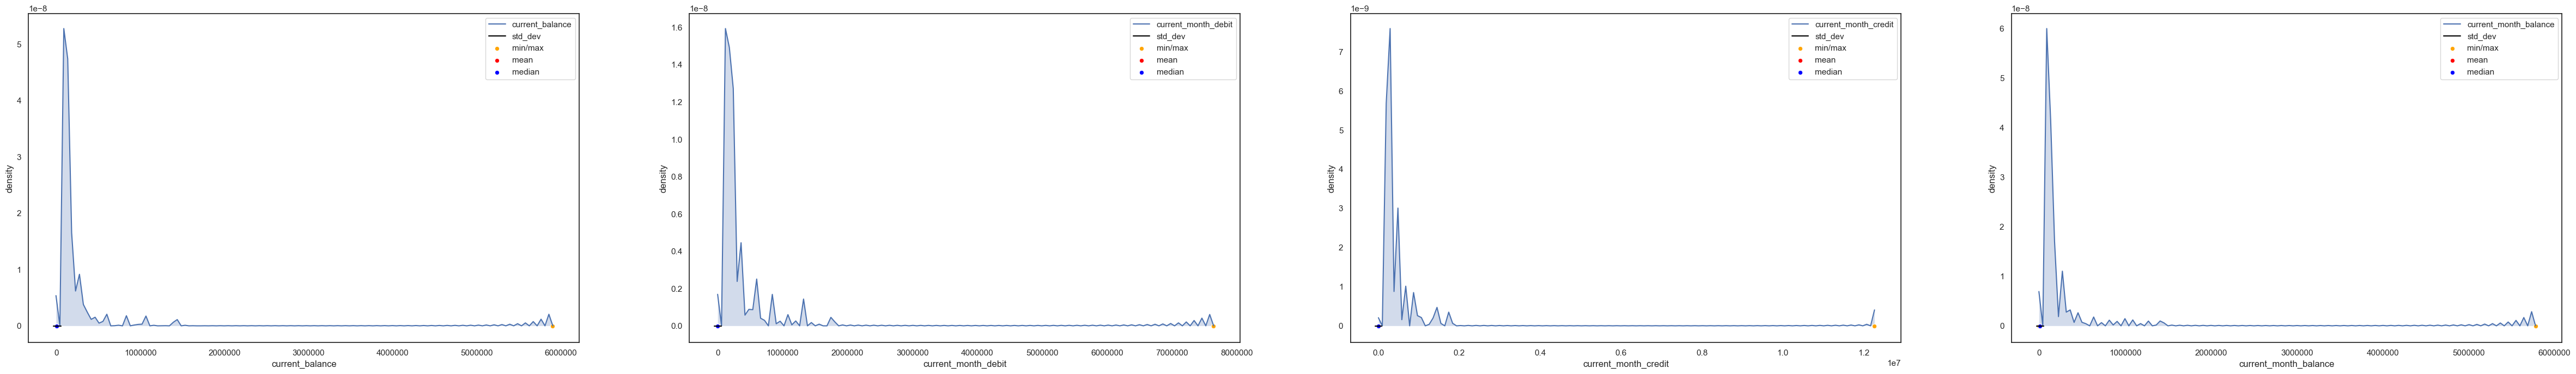

In [18]:
UVA_numeric(data, current_month)